# Eyewear Product Analysis - Data Processing and Modeling

## Project Overview
This notebook contains the data preparation and modeling components for the VSP Vision eyewear product analysis project. The goal is to predict optimal frame assortments for retail stores based on product attributes and sales data.

## Tasks Covered:
1. **Data Exploration & Cleaning**: Handle missing values, standardize frame attributes, encode categorical data
2. **Exploratory Data Analysis**: Understand data patterns and distributions
3. **Clustering Analysis**: Identify frame assortment groupings using K-means
4. **Predictive Modeling**: Build regression/classification models for sales prediction
5. **Feature Importance**: Analyze which attributes are most important for sales

## Dataset Information:
- **Source**: VSP Vision eyewear product data
- **Size**: ~647K records
- **Key Features**: Style attributes, geographic location, sales quantities

In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



## 1. Data Exploratory Analysis


In [38]:
# Load the eyewear dataset
df = pd.read_csv('/Users/wenyuliu/dspm-Project/VSP_Dataset.csv')

print(f"Dataset shape: {df.shape}")

# Display basic information about the dataset

print(f"Number of records: {len(df):,}")
print(f"Number of features: {len(df.columns)}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Display first few rows to understand the data structure
print("FIRST 5 ROWS")
df.head()


Dataset shape: (647614, 26)
Number of records: 647,614
Number of features: 26
Date range: 0 to 647613
FIRST 5 ROWS


,style_name,state,city_district,city,size,color,temple_length,color_description,color_family,hex_color,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,division_name,frame_construction,frame_shape_code,frame_shape,gender_code,gender,gross_weight,brand_name,front_material_name,temple_material_name,order_qty
0,style555,NC,GUILFORD,GREENSBORO,5116,1,135,ONYX MATTE W/STAR PHOSPHO T,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2610
1,style555,NC,GUILFORD,GREENSBORO,5116,4,135,BLACK MATTE W/STAR PHOSPHO,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2428
2,style100,GA,GWINNETT,LAWRENCEVILLE,5316,259,140,HONEY TORTOISE,BROWN,#BAA38A,53.0,45.5,59.90,16.0,163.3,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,F,FEMALE,226.80,brand2,ACETATE,ACETATE,2300
3,style928,GA,GWINNETT,LAWRENCEVILLE,5517,220,145,TORTOISE/GREEN,BROWN,#704628,55.0,43.1,61.68,17.0,163.7,SPORTS & TECHNOLOGY,FULL RIM,S,SQUARE,U,UNISEX,141.75,brand15,BIO INJECTED,BIO INJECTED,2146
4,style301,GA,GWINNETT,LAWRENCEVILLE,5516,237,135,DARK TORTOISE/RED,BROWN,#B68963,55.0,45.5,0.00,16.0,0.0,DESIGNER,FULL RIM,C,CAT EYE,F,FEMALE,226.80,brand5,ACETATE,ACETATE,2101


In [39]:
# Examine data types and missing values

print("DATA TYPES AND MISSING VALUES")

df['color'] = df['color'].astype(str)
df['color'].dtypes
print(df.dtypes)

DATA TYPES AND MISSING VALUES
style_name               object
state                    object
city_district            object
city                     object
size                      int64
color                    object
temple_length             int64
color_description        object
color_family             object
hex_color                object
lens size (a)           float64
lens height (b)         float64
Lens diameter (ed)      float64
bridge size (dbl)       float64
circumference           float64
division_name            object
frame_construction       object
frame_shape_code         object
frame_shape              object
gender_code              object
gender                   object
gross_weight            float64
brand_name               object
front_material_name      object
temple_material_name     object
order_qty                 int64
dtype: object


In [40]:
print("\nMissing Values:")
missing_data = df.isnull().sum()
print("missing value counts: ", 0)
print("")

# Basic statistics for numerical column
print("NUMERICAL COLUMNS SUMMARY")
df.describe()


Missing Values:
missing value counts:  0

NUMERICAL COLUMNS SUMMARY


,size,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty
count,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000
mean,5347.764349,141.762323,53.307161,37.389756,35.057278,17.039849,92.395292,153.175200,1.554942
std,269.909436,4.276281,2.699454,10.483787,29.099729,1.488755,77.671502,74.757954,14.463953
min,4518.000000,115.000000,45.000000,0.000000,0.000000,2.000000,0.000000,21.000000,0.000000
25%,5216.000000,140.000000,52.000000,36.600000,0.000000,16.000000,0.000000,56.700000,1.000000
50%,5319.000000,140.000000,53.000000,39.300000,54.040000,17.000000,145.970000,141.750000,1.000000
75%,5517.000000,145.000000,55.000000,42.200000,59.000000,18.000000,156.800000,226.800000,1.000000
max,7507.000000,150.000000,75.000000,58.800000,155.100000,24.000000,412.120000,300.000000,2610.000000


In [41]:
# Explore categorical variables and their unique values
print("CATEGORICAL VARIABLES ANALYSIS")

categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

print(df['frame_shape'].nunique(), 'categorical columns')

CATEGORICAL VARIABLES ANALYSIS
Categorical columns: Index(['style_name', 'state', 'city_district', 'city', 'color',
       'color_description', 'color_family', 'hex_color', 'division_name',
       'frame_construction', 'frame_shape_code', 'frame_shape', 'gender_code',
       'gender', 'brand_name', 'front_material_name', 'temple_material_name'],
      dtype='object')
11 categorical columns


In [42]:
# check how many different characteristics among each feature
print(len(df['color_family'].unique()))
print(len(df['brand_name'].unique()))
print(len(df['frame_shape'].unique()))
print(len(df['gender'].unique()))
print(len(df['division_name'].unique()))
print(len(df['frame_construction'].unique()))
print(len(df['front_material_name'].unique()))

17
20
11
6
3
5
27


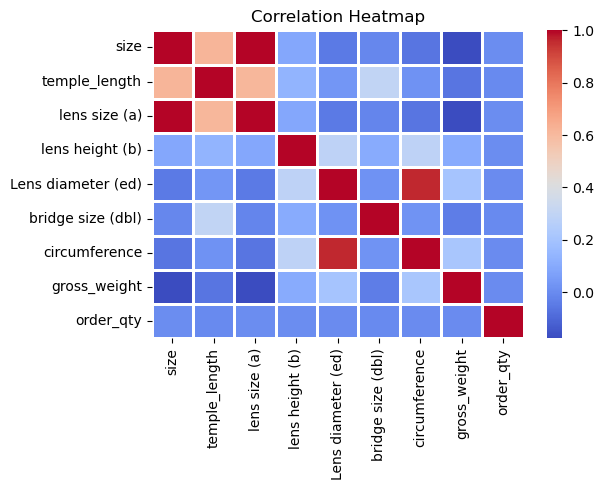

In [43]:
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
numeric_df.columns

Index(['size', 'temple_length', 'lens size (a)', 'lens height (b)',
       'Lens diameter (ed)', 'bridge size (dbl)', 'circumference',
       'gross_weight', 'order_qty'],
      dtype='object')

In [45]:
print(numeric_df.isnull().sum()) # to verify number of null values

size                  0
temple_length         0
lens size (a)         0
lens height (b)       0
Lens diameter (ed)    0
bridge size (dbl)     0
circumference         0
gross_weight          0
order_qty             0
dtype: int64


### Scaling

In [46]:
# aggregate order qty on style_name, brand_name, frame_shape, gender
order_agg = (
    df.groupby(['style_name', 'brand_name', 'frame_shape', 'gender'])
      .agg({'order_qty': 'sum'})
      .reset_index()
)

#diminishing large orders effect by taking log
order_agg['order_qty_log'] = np.log1p(order_agg['order_qty'])

#scale log order qty
scaler = StandardScaler()
order_agg['order_qty_log_scaled'] = scaler.fit_transform(order_agg[['order_qty_log']])

# merge order_qty_log_scaled to df dataframe
df_merged = df.merge(
    order_agg[['style_name','brand_name','frame_shape','gender','order_qty_log_scaled']], 
    on=['style_name','brand_name','frame_shape','gender'], 
    how='left'
)


#scale numerical columns
numeric_features = ['size', 'temple_length', 'lens size (a)', 'lens height (b)',
       'Lens diameter (ed)', 'bridge size (dbl)', 'circumference', 'gross_weight']

scaler_num = StandardScaler()
df_merged[numeric_features] = scaler_num.fit_transform(df_merged[numeric_features])


categorical_features = [
    'brand_name', 
    'frame_shape', 
    'gender', 
    'color_family', 
    'division_name',
    'frame_construction', 
    'front_material_name'
]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
cat_encoded = encoder.fit_transform(df_merged[categorical_features])

# transfer to dataframe
cat_encoded_df = pd.DataFrame(
    data = cat_encoded,
    columns=encoder.get_feature_names_out(categorical_features),
    index=df_merged.index
)


X = pd.concat([df_merged[numeric_features + ['order_qty_log_scaled']], cat_encoded_df], axis=1)
X.head()

,size,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty_log_scaled,brand_name_brand1,brand_name_brand10,brand_name_brand11,brand_name_brand12,brand_name_brand13,brand_name_brand14,brand_name_brand15,brand_name_brand16,brand_name_brand17,brand_name_brand18,brand_name_brand19,brand_name_brand2,brand_name_brand20,brand_name_brand3,brand_name_brand4,brand_name_brand5,brand_name_brand6,brand_name_brand7,brand_name_brand8,brand_name_brand9,frame_shape_AVIATOR,frame_shape_BUTTERFLY,frame_shape_CAT EYE,frame_shape_MODIFIED RECTANGLE,frame_shape_NAVIGATOR,frame_shape_OVAL,frame_shape_RECTANGLE,frame_shape_ROUND,frame_shape_SHIELD,frame_shape_SQUARE,frame_shape_TEA CUP,gender_BOY,gender_CHILD,gender_FEMALE,gender_GIRL,gender_MALE,gender_UNISEX,color_family_BLACK,color_family_BLUE,color_family_BROWN,color_family_CLEAR,color_family_DARK GREY,color_family_GOLD,color_family_GREEN,color_family_GREY,color_family_MULTICOLOR,color_family_ORANGE,color_family_PINK,color_family_PURPLE,color_family_RED,color_family_SILVER,color_family_TORTOISE,color_family_WHITE,color_family_YELLOW,division_name_CORE BRANDS,division_name_DESIGNER,division_name_SPORTS & TECHNOLOGY,frame_construction_3 PC COMPRESSION MOUNT,frame_construction_3 PC SCREW MOUNT,frame_construction_FULL RIM,frame_construction_SEMI-RIMLESS,frame_construction_SHIELD,front_material_name_ACETATE,front_material_name_ALUMINUM,front_material_name_ALUMINUM ALLOY,front_material_name_BIO ACETATE,front_material_name_BIO ACETATE-M49,front_material_name_BIO INJ-G820,front_material_name_BIO INJ-G850,front_material_name_BIO INJ-TENITE RENEW,front_material_name_BIO INJECTED,front_material_name_CO-INJECTION,front_material_name_FLEXON,front_material_name_INJ-ULTEM,front_material_name_INJECTED,front_material_name_INJECTED ACETATE,front_material_name_INJECTED CP,front_material_name_METAL,front_material_name_METAL-STAINLESS,front_material_name_REC ACETATE-RENEW,front_material_name_REC INJ-ACE RENEW,front_material_name_REC INJ-RPET,front_material_name_REC INJ-TRITAN RENEW,front_material_name_REC METAL-STAINLESS,front_material_name_RECYCLED ACETATE,front_material_name_RECYCLED INJECTED,front_material_name_RPET,front_material_name_TITANIUM,front_material_name_ZYL
0,-0.858675,-1.581357,-0.854677,-3.566439,-1.204730,-0.698469,-1.189566,-0.152829,3.963407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.858675,-1.581357,-0.854677,-3.566439,-1.204730,-0.698469,-1.189566,-0.152829,3.963407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.117685,-0.412116,-0.113786,0.773599,0.853710,-0.698469,0.912880,0.984843,2.927602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.627010,0.757125,0.627105,0.544674,0.914879,-0.026767,0.918030,-0.152829,3.504640,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [47]:
len(X.columns)

98

### PCA

In [48]:
# run PCA
pca = PCA(n_components=0.9)  # keep enough components to explain 90% variance
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# then do clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

Original shape: (647614, 98)
Reduced shape: (647614, 20)


In [49]:
print("PCs kept:", pca.n_components_)                    
print("Cumulative variance:", pca.explained_variance_ratio_.sum())


PCs kept: 20
Cumulative variance: 0.9021104535745464


In [50]:
#top contributing features to PC1/PC2
loadings = pd.DataFrame(pca.components_.T, index=X.columns,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [51]:
#Top 10 absolute contributors to PC1 and PC2
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

size                    0.560880
lens size (a)           0.560160
temple_length           0.486253
gender_MALE             0.182720
gross_weight            0.167398
bridge size (dbl)       0.118818
order_qty_log_scaled    0.096060
circumference           0.085080
Lens diameter (ed)      0.075328
gender_FEMALE           0.073782
Name: PC1, dtype: float64
circumference                        0.612159
Lens diameter (ed)                   0.611245
lens height (b)                      0.325737
gross_weight                         0.249492
temple_length                        0.129822
division_name_SPORTS & TECHNOLOGY    0.101692
division_name_CORE BRANDS            0.090408
brand_name_brand15                   0.089746
bridge size (dbl)                    0.088855
brand_name_brand12                   0.083935
Name: PC2, dtype: float64


In [52]:
# use silhouette and elbow to decide k
from sklearn.metrics import silhouette_score

ks = range(2, 11)
inertias, sils = [], []

# silhouette on a sample
rng = np.random.default_rng(42)
idx = rng.choice(X_pca.shape[0], size=min(50000, X_pca.shape[0]), replace=False)
X_s = X_pca[idx]

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_s, km.predict(X_s)))

print(list(zip(ks, inertias, sils)))

[(2, 6660525.568083135, 0.18372105812166648), (3, 5903330.244302317, 0.1873349202177094), (4, 5398469.708908856, 0.1924553858640582), (5, 5024256.3444953915, 0.16411899451978898), (6, 4685159.613548973, 0.16547691562366867), (7, 4387566.411421982, 0.17258506620621672), (8, 4199731.163843713, 0.17146318413273656), (9, 4016496.394602185, 0.17224954451421093), (10, 3842802.7460536202, 0.18044882532197928)]


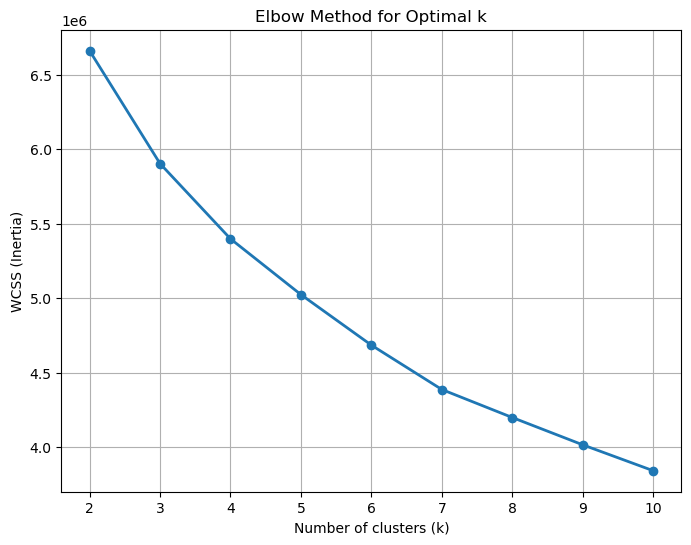

In [53]:
# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(ks, inertias, 'o-', linewidth=2)
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [54]:
#max of silhouette
max(sils)


0.1924553858640582

### Based on elbow and silhouette result, we decide to cluster with 4

In [55]:
#fit KMeans with k=4 (best number from elbow/silhouette)
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
clusters = kmeans.fit_predict(X)

In [56]:
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X)

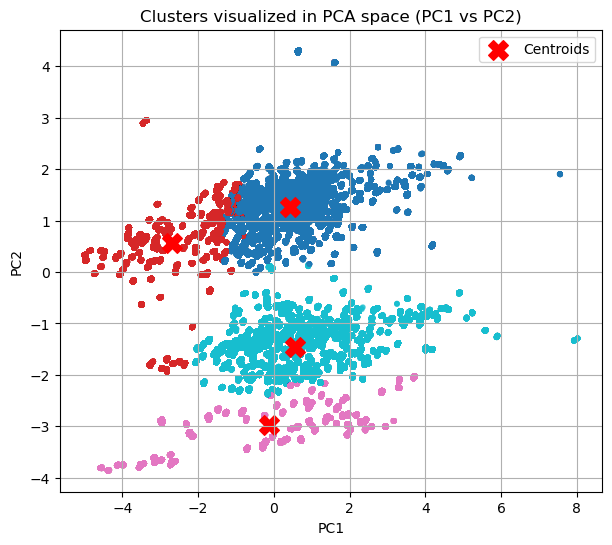

In [57]:
# Step 3: scatterplot in PCA space
plt.figure(figsize=(7,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c=clusters, cmap="tab10", s=10, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized in PCA space (PC1 vs PC2)")

# highlight centroids (also projected into PCA 2D)
centroids = pca_vis.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="X", s=200, label="Centroids")

plt.legend()
plt.grid(True)
plt.show()

In [58]:
df_clusters = X.copy()
df_clusters['cluster'] = clusters
cluster_summary = df_clusters.groupby('cluster').mean()
cluster_summary

,size,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty_log_scaled,brand_name_brand1,brand_name_brand10,brand_name_brand11,brand_name_brand12,brand_name_brand13,brand_name_brand14,brand_name_brand15,brand_name_brand16,brand_name_brand17,brand_name_brand18,brand_name_brand19,brand_name_brand2,brand_name_brand20,brand_name_brand3,brand_name_brand4,brand_name_brand5,brand_name_brand6,brand_name_brand7,brand_name_brand8,brand_name_brand9,frame_shape_AVIATOR,frame_shape_BUTTERFLY,frame_shape_CAT EYE,frame_shape_MODIFIED RECTANGLE,frame_shape_NAVIGATOR,frame_shape_OVAL,frame_shape_RECTANGLE,frame_shape_ROUND,frame_shape_SHIELD,frame_shape_SQUARE,frame_shape_TEA CUP,gender_BOY,gender_CHILD,gender_FEMALE,gender_GIRL,gender_MALE,gender_UNISEX,color_family_BLACK,color_family_BLUE,color_family_BROWN,color_family_CLEAR,color_family_DARK GREY,color_family_GOLD,color_family_GREEN,color_family_GREY,color_family_MULTICOLOR,color_family_ORANGE,color_family_PINK,color_family_PURPLE,color_family_RED,color_family_SILVER,color_family_TORTOISE,color_family_WHITE,color_family_YELLOW,division_name_CORE BRANDS,division_name_DESIGNER,division_name_SPORTS & TECHNOLOGY,frame_construction_3 PC COMPRESSION MOUNT,frame_construction_3 PC SCREW MOUNT,frame_construction_FULL RIM,frame_construction_SEMI-RIMLESS,frame_construction_SHIELD,front_material_name_ACETATE,front_material_name_ALUMINUM,front_material_name_ALUMINUM ALLOY,front_material_name_BIO ACETATE,front_material_name_BIO ACETATE-M49,front_material_name_BIO INJ-G820,front_material_name_BIO INJ-G850,front_material_name_BIO INJ-TENITE RENEW,front_material_name_BIO INJECTED,front_material_name_CO-INJECTION,front_material_name_FLEXON,front_material_name_INJ-ULTEM,front_material_name_INJECTED,front_material_name_INJECTED ACETATE,front_material_name_INJECTED CP,front_material_name_METAL,front_material_name_METAL-STAINLESS,front_material_name_REC ACETATE-RENEW,front_material_name_REC INJ-ACE RENEW,front_material_name_REC INJ-RPET,front_material_name_REC INJ-TRITAN RENEW,front_material_name_REC METAL-STAINLESS,front_material_name_RECYCLED ACETATE,front_material_name_RECYCLED INJECTED,front_material_name_RPET,front_material_name_TITANIUM,front_material_name_ZYL
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.319090,0.323779,0.318811,0.286096,0.841090,0.048470,0.834247,0.106987,0.773255,0.006236,0.065269,0.122237,0.025221,0.005982,0.031315,0.232823,0.023793,0.002285,0.013000,0.007377,0.172184,0.002454,0.045430,0.029564,0.009784,0.048434,0.071914,0.084583,0.000115,0.00776,0.028331,0.056230,0.401716,0.004017,0.018850,0.274750,0.030474,0.000000,0.149483,0.028390,0.000000,0.000000,0.359096,0.000000,0.547743,0.093161,0.283443,0.139039,0.163986,0.017989,0.002219,0.026075,0.080798,0.110797,0.001151,0.001751,0.017729,0.024242,0.042805,0.064461,0.001484,0.002770,0.019262,0.143300,0.506145,0.350555,0.003469,0.001563,0.923140,0.071828,0.000000,0.352151,0.000000,0.001514,0.000735,0.003532,0.014975,0.034587,0.000435,0.185392,0.000000,0.102800,0.000000,0.017287,0.012927,0.013527,0.194949,0.000000,0.020377,0.000007,0.003937,0.000000,0.000000,0.017785,0.000000,0.003383,0.019701,0.000000
1,-1.589188,-1.217227,-1.588499,-0.006593,0.521126,-0.121316,0.555796,0.503005,1.035688,0.001365,0.126564,0.042688,0.001029,0.000000,0.000000,0.395658,0.142162,0.002484,0.017478,0.004879,0.013808,0.000000,0.000000,0.097046,0.019514,0.011178,0.012913,0.111234,0.000000,0.00000,0.044556,0.058700,0.365503,0.000000,0.053810,0.125199,0.167909,0.000224,0.156205,0.027895,0.274264,0.186606,0.311917,0.105494,0.034519,0.087199,0.199429,0.201141,0.099799,0.055175,0.000000,0.021349,0.072541,0.132047,0.000000,0.013192,0.037395,0.097572,0.039141,0.019358,0.001085,0.002820,0.007956,0.138279,0.360132,0.501589,0.001365,0.000000,0.981403,0.017008,0.000224,0.310059,0.000000,0.000000,0.000000,0.000000,0.012924,0.079915,0.000000,0.237261,

In [ ]:
def top_features(cluster_summary, cluster_id, top_n=10):
    cluster = cluster_summary.loc[cluster_id]
    
    # number features top ones
    num_feats = cluster[numeric_features + ['order_qty_log_scaled']].sort_values(key=abs, ascending=False).head(top_n)
    
    # categorical top ones
    cat_feats = cluster[cat_encoded_df.columns].sort_values(ascending=False).head(top_n)
    
    print(f"=== Cluster {cluster_id} ===")
    print("Top numeric features:\n", num_feats, "\n")
    print("Top categorical features:\n", cat_feats, "\n")

# check cluster 0
top_features(cluster_summary, 0, top_n=5)

=== Cluster 0 ===
Top numeric features:
 Lens diameter (ed)      0.841090
circumference           0.834247
order_qty_log_scaled    0.773255
temple_length           0.323779
size                    0.319090
Name: 0, dtype: float64 

Top categorical features:
 frame_construction_FULL RIM       0.923140
gender_MALE                       0.547743
division_name_DESIGNER            0.506145
frame_shape_MODIFIED RECTANGLE    0.401716
gender_FEMALE                     0.359096
Name: 0, dtype: float64 



In [60]:
top_features(cluster_summary, 1, top_n=5)

=== Cluster 1 ===
Top numeric features:
 size                   -1.589188
lens size (a)          -1.588499
temple_length          -1.217227
order_qty_log_scaled    1.035688
circumference           0.555796
Name: 1, dtype: float64 

Top categorical features:
 frame_construction_FULL RIM          0.981403
division_name_SPORTS & TECHNOLOGY    0.501589
brand_name_brand15                   0.395658
frame_shape_MODIFIED RECTANGLE       0.365503
division_name_DESIGNER               0.360132
Name: 1, dtype: float64 



In [61]:
top_features(cluster_summary, 2, top_n=5)

=== Cluster 2 ===
Top numeric features:
 lens height (b)        -3.566439
Lens diameter (ed)     -1.204730
circumference          -1.189566
order_qty_log_scaled    0.946330
gross_weight           -0.613988
Name: 2, dtype: float64 

Top categorical features:
 frame_construction_FULL RIM    0.887476
division_name_CORE BRANDS      0.562810
gender_MALE                    0.428986
brand_name_brand12             0.404543
gender_FEMALE                  0.346542
Name: 2, dtype: float64 



In [62]:
top_features(cluster_summary, 3, top_n=5)

=== Cluster 3 ===
Top numeric features:
 circumference          -1.186295
Lens diameter (ed)     -1.178535
order_qty_log_scaled    0.815665
lens height (b)         0.293063
gross_weight           -0.242831
Name: 3, dtype: float64 

Top categorical features:
 frame_construction_FULL RIM    0.962014
division_name_DESIGNER         0.587654
gender_FEMALE                  0.527358
front_material_name_ACETATE    0.430197
gender_MALE                    0.427708
Name: 3, dtype: float64 



### Analyze each cluster
	Cluster 0: Large, premium designer frames (unisex).
	Cluster 1: Small, sporty/technical frames (sports division).
	Cluster 2: Affordable, lightweight core-brand frames (mass-market).
	Cluster 3: Designer acetate frames, more female-oriented.


In [63]:
df_clusters.head()

,size,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty_log_scaled,brand_name_brand1,brand_name_brand10,brand_name_brand11,brand_name_brand12,brand_name_brand13,brand_name_brand14,brand_name_brand15,brand_name_brand16,brand_name_brand17,brand_name_brand18,brand_name_brand19,brand_name_brand2,brand_name_brand20,brand_name_brand3,brand_name_brand4,brand_name_brand5,brand_name_brand6,brand_name_brand7,brand_name_brand8,brand_name_brand9,frame_shape_AVIATOR,frame_shape_BUTTERFLY,frame_shape_CAT EYE,frame_shape_MODIFIED RECTANGLE,frame_shape_NAVIGATOR,frame_shape_OVAL,frame_shape_RECTANGLE,frame_shape_ROUND,frame_shape_SHIELD,frame_shape_SQUARE,frame_shape_TEA CUP,gender_BOY,gender_CHILD,gender_FEMALE,gender_GIRL,gender_MALE,gender_UNISEX,color_family_BLACK,color_family_BLUE,color_family_BROWN,color_family_CLEAR,color_family_DARK GREY,color_family_GOLD,color_family_GREEN,color_family_GREY,color_family_MULTICOLOR,color_family_ORANGE,color_family_PINK,color_family_PURPLE,color_family_RED,color_family_SILVER,color_family_TORTOISE,color_family_WHITE,color_family_YELLOW,division_name_CORE BRANDS,division_name_DESIGNER,division_name_SPORTS & TECHNOLOGY,frame_construction_3 PC COMPRESSION MOUNT,frame_construction_3 PC SCREW MOUNT,frame_construction_FULL RIM,frame_construction_SEMI-RIMLESS,frame_construction_SHIELD,front_material_name_ACETATE,front_material_name_ALUMINUM,front_material_name_ALUMINUM ALLOY,front_material_name_BIO ACETATE,front_material_name_BIO ACETATE-M49,front_material_name_BIO INJ-G820,front_material_name_BIO INJ-G850,front_material_name_BIO INJ-TENITE RENEW,front_material_name_BIO INJECTED,front_material_name_CO-INJECTION,front_material_name_FLEXON,front_material_name_INJ-ULTEM,front_material_name_INJECTED,front_material_name_INJECTED ACETATE,front_material_name_INJECTED CP,front_material_name_METAL,front_material_name_METAL-STAINLESS,front_material_name_REC ACETATE-RENEW,front_material_name_REC INJ-ACE RENEW,front_material_name_REC INJ-RPET,front_material_name_REC INJ-TRITAN RENEW,front_material_name_REC METAL-STAINLESS,front_material_name_RECYCLED ACETATE,front_material_name_RECYCLED INJECTED,front_material_name_RPET,front_material_name_TITANIUM,front_material_name_ZYL,cluster
0,-0.858675,-1.581357,-0.854677,-3.566439,-1.204730,-0.698469,-1.189566,-0.152829,3.963407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,-0.858675,-1.581357,-0.854677,-3.566439,-1.204730,-0.698469,-1.189566,-0.152829,3.963407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,-0.117685,-0.412116,-0.113786,0.773599,0.853710,-0.698469,0.912880,0.984843,2.927602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.627010,0.757125,0.627105,0.544674,0.914879,-0.026767,0.918030,-0.152829,3.504640,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [64]:
# Merge clusters back with original df (before scaling/encoding)
df_clusters = df.copy()

In [65]:
df_clusters['cluster'] = clusters

In [66]:
#now use real sale metrics
# total sales per cluster
sales_summary = df_clusters.groupby('cluster')['order_qty'].sum()

# average sales per product in each cluster
avg_sales = df_clusters.groupby('cluster')['order_qty'].mean()
print("total sales per cluster")
print(sales_summary)
print("avg_sales per cluster")
print(avg_sales)

total sales per cluster
cluster
0    471836
1    139643
2     64914
3    330609
Name: order_qty, dtype: int64
avg_sales per cluster
cluster
0    1.555987
1    1.562527
2    1.557101
3    1.549856
Name: order_qty, dtype: float64


In [67]:
# top brands by cluster
top_brands = (
    df_clusters.groupby(['cluster','brand_name'])['order_qty']
    .sum()
    .reset_index()
    .sort_values(['cluster','order_qty'], ascending=[True, False])
    .groupby('cluster')
    .head(3)
)

top_brands

,cluster,brand_name,order_qty
6,0,brand15,122283
11,0,brand2,86244
2,0,brand11,58287
24,1,brand15,53097
21,1,brand10,30836
25,1,brand16,15572
36,2,brand10,21297
37,2,brand12,20369
45,2,brand8,7038
49,3,brand12,48889


### Conclusion


	•	Invest more in Cluster 0 brands (esp. Brand15 & Brand2) → they drive most revenue.
	•	Watch Cluster 3 → potential for diversification and secondary growth.
	•	Clusters 1 & 2 are smaller, but may represent niche or premium positioning.

### Regression Modeling & Feature Importance

In [73]:
X.head()

,size,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty_log_scaled,brand_name_brand1,brand_name_brand10,brand_name_brand11,brand_name_brand12,brand_name_brand13,brand_name_brand14,brand_name_brand15,brand_name_brand16,brand_name_brand17,brand_name_brand18,brand_name_brand19,brand_name_brand2,brand_name_brand20,brand_name_brand3,brand_name_brand4,brand_name_brand5,brand_name_brand6,brand_name_brand7,brand_name_brand8,brand_name_brand9,frame_shape_AVIATOR,frame_shape_BUTTERFLY,frame_shape_CAT EYE,frame_shape_MODIFIED RECTANGLE,frame_shape_NAVIGATOR,frame_shape_OVAL,frame_shape_RECTANGLE,frame_shape_ROUND,frame_shape_SHIELD,frame_shape_SQUARE,frame_shape_TEA CUP,gender_BOY,gender_CHILD,gender_FEMALE,gender_GIRL,gender_MALE,gender_UNISEX,color_family_BLACK,color_family_BLUE,color_family_BROWN,color_family_CLEAR,color_family_DARK GREY,color_family_GOLD,color_family_GREEN,color_family_GREY,color_family_MULTICOLOR,color_family_ORANGE,color_family_PINK,color_family_PURPLE,color_family_RED,color_family_SILVER,color_family_TORTOISE,color_family_WHITE,color_family_YELLOW,division_name_CORE BRANDS,division_name_DESIGNER,division_name_SPORTS & TECHNOLOGY,frame_construction_3 PC COMPRESSION MOUNT,frame_construction_3 PC SCREW MOUNT,frame_construction_FULL RIM,frame_construction_SEMI-RIMLESS,frame_construction_SHIELD,front_material_name_ACETATE,front_material_name_ALUMINUM,front_material_name_ALUMINUM ALLOY,front_material_name_BIO ACETATE,front_material_name_BIO ACETATE-M49,front_material_name_BIO INJ-G820,front_material_name_BIO INJ-G850,front_material_name_BIO INJ-TENITE RENEW,front_material_name_BIO INJECTED,front_material_name_CO-INJECTION,front_material_name_FLEXON,front_material_name_INJ-ULTEM,front_material_name_INJECTED,front_material_name_INJECTED ACETATE,front_material_name_INJECTED CP,front_material_name_METAL,front_material_name_METAL-STAINLESS,front_material_name_REC ACETATE-RENEW,front_material_name_REC INJ-ACE RENEW,front_material_name_REC INJ-RPET,front_material_name_REC INJ-TRITAN RENEW,front_material_name_REC METAL-STAINLESS,front_material_name_RECYCLED ACETATE,front_material_name_RECYCLED INJECTED,front_material_name_RPET,front_material_name_TITANIUM,front_material_name_ZYL
0,-0.858675,-1.581357,-0.854677,-3.566439,-1.204730,-0.698469,-1.189566,-0.152829,3.963407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.858675,-1.581357,-0.854677,-3.566439,-1.204730,-0.698469,-1.189566,-0.152829,3.963407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.117685,-0.412116,-0.113786,0.773599,0.853710,-0.698469,0.912880,0.984843,2.927602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.627010,0.757125,0.627105,0.544674,0.914879,-0.026767,0.918030,-0.152829,3.504640,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [ ]:
# Features (X) and target (y)
y = X['order_qty_log_scaled'] # target scaled log_order_qty
X = X.drop(columns=['order_qty_log_scaled'])  # features only

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Fit random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

print(feat_importances.head(20))

lens height (b)                   0.225324
bridge size (dbl)                 0.086738
Lens diameter (ed)                0.083794
size                              0.077810
gross_weight                      0.074765
circumference                     0.064063
brand_name_brand10                0.037272
brand_name_brand4                 0.033382
brand_name_brand15                0.029348
frame_shape_RECTANGLE             0.027649
frame_shape_SQUARE                0.021593
lens size (a)                     0.020790
temple_length                     0.020104
front_material_name_TITANIUM      0.016613
brand_name_brand5                 0.014830
brand_name_brand2                 0.012851
frame_shape_MODIFIED RECTANGLE    0.012387
front_material_name_METAL         0.011338
brand_name_brand1                 0.009903
front_material_name_ACETATE       0.008176
dtype: float64


### Feature Importance Plot

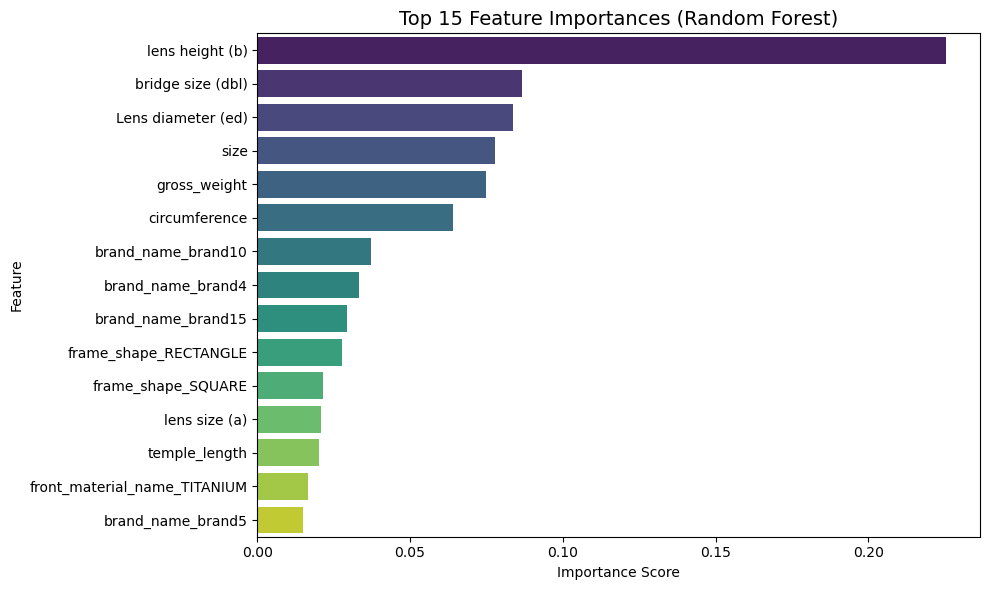

In [ ]:
# Take top 15 features
top_n = 15
top_features = feat_importances.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [83]:
df_clusters.head()

,style_name,state,city_district,city,size,color,temple_length,color_description,color_family,hex_color,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,division_name,frame_construction,frame_shape_code,frame_shape,gender_code,gender,gross_weight,brand_name,front_material_name,temple_material_name,order_qty,cluster
0,style555,NC,GUILFORD,GREENSBORO,5116,1,135,ONYX MATTE W/STAR PHOSPHO T,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2610,2
1,style555,NC,GUILFORD,GREENSBORO,5116,4,135,BLACK MATTE W/STAR PHOSPHO,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2428,2
2,style100,GA,GWINNETT,LAWRENCEVILLE,5316,259,140,HONEY TORTOISE,BROWN,#BAA38A,53.0,45.5,59.90,16.0,163.3,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,F,FEMALE,226.80,brand2,ACETATE,ACETATE,2300,0
3,style928,GA,GWINNETT,LAWRENCEVILLE,5517,220,145,TORTOISE/GREEN,BROWN,#704628,55.0,43.1,61.68,17.0,163.7,SPORTS & TECHNOLOGY,FULL RIM,S,SQUARE,U,UNISEX,141.75,brand15,BIO INJECTED,BIO INJECTED,2146,0
4,style301,GA,GWINNETT,LAWRENCEVILLE,5516,237,135,DARK TORTOISE/RED,BROWN,#B68963,55.0,45.5,0.00,16.0,0.0,DESIGNER,FULL RIM,C,CAT EYE,F,FEMALE,226.80,brand5,ACETATE,ACETATE,2101,3


### Analyze of Norm of Size in certain locations

In [88]:
df.head()

,style_name,state,city_district,city,size,color,temple_length,color_description,color_family,hex_color,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,division_name,frame_construction,frame_shape_code,frame_shape,gender_code,gender,gross_weight,brand_name,front_material_name,temple_material_name,order_qty
0,style555,NC,GUILFORD,GREENSBORO,5116,1,135,ONYX MATTE W/STAR PHOSPHO T,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2610
1,style555,NC,GUILFORD,GREENSBORO,5116,4,135,BLACK MATTE W/STAR PHOSPHO,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2428
2,style100,GA,GWINNETT,LAWRENCEVILLE,5316,259,140,HONEY TORTOISE,BROWN,#BAA38A,53.0,45.5,59.90,16.0,163.3,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,F,FEMALE,226.80,brand2,ACETATE,ACETATE,2300
3,style928,GA,GWINNETT,LAWRENCEVILLE,5517,220,145,TORTOISE/GREEN,BROWN,#704628,55.0,43.1,61.68,17.0,163.7,SPORTS & TECHNOLOGY,FULL RIM,S,SQUARE,U,UNISEX,141.75,brand15,BIO INJECTED,BIO INJECTED,2146
4,style301,GA,GWINNETT,LAWRENCEVILLE,5516,237,135,DARK TORTOISE/RED,BROWN,#B68963,55.0,45.5,0.00,16.0,0.0,DESIGNER,FULL RIM,C,CAT EYE,F,FEMALE,226.80,brand5,ACETATE,ACETATE,2101


In [89]:
# Example state-to-region mapping
region_map = {
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast','CT':'Northeast',
    'NY':'Northeast','NJ':'Northeast','PA':'Northeast',
    'OH':'Midwest','IN':'Midwest','IL':'Midwest','MI':'Midwest','WI':'Midwest',
    'MN':'Midwest','IA':'Midwest','MO':'Midwest','ND':'Midwest','SD':'Midwest','NE':'Midwest','KS':'Midwest',
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South','NC':'South','SC':'South','GA':'South','FL':'South',
    'KY':'South','TN':'South','MS':'South','AL':'South','OK':'South','TX':'South','AR':'South','LA':'South',
    'MT':'West','ID':'West','WY':'West','NV':'West','UT':'West','CO':'West','AZ':'West','NM':'West',
    'AK':'West','WA':'West','OR':'West','CA':'West','HI':'West'
}

df['region'] = df['state'].map(region_map)

In [91]:
df.head()

,style_name,state,city_district,city,size,color,temple_length,color_description,color_family,hex_color,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,division_name,frame_construction,frame_shape_code,frame_shape,gender_code,gender,gross_weight,brand_name,front_material_name,temple_material_name,order_qty,region
0,style555,NC,GUILFORD,GREENSBORO,5116,1,135,ONYX MATTE W/STAR PHOSPHO T,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2610,South
1,style555,NC,GUILFORD,GREENSBORO,5116,4,135,BLACK MATTE W/STAR PHOSPHO,BLACK,#000000,51.0,0.0,0.00,16.0,0.0,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2428,South
2,style100,GA,GWINNETT,LAWRENCEVILLE,5316,259,140,HONEY TORTOISE,BROWN,#BAA38A,53.0,45.5,59.90,16.0,163.3,DESIGNER,FULL RIM,M,MODIFIED RECTANGLE,F,FEMALE,226.80,brand2,ACETATE,ACETATE,2300,South
3,style928,GA,GWINNETT,LAWRENCEVILLE,5517,220,145,TORTOISE/GREEN,BROWN,#704628,55.0,43.1,61.68,17.0,163.7,SPORTS & TECHNOLOGY,FULL RIM,S,SQUARE,U,UNISEX,141.75,brand15,BIO INJECTED,BIO INJECTED,2146,South
4,style301,GA,GWINNETT,LAWRENCEVILLE,5516,237,135,DARK TORTOISE/RED,BROWN,#B68963,55.0,45.5,0.00,16.0,0.0,DESIGNER,FULL RIM,C,CAT EYE,F,FEMALE,226.80,brand5,ACETATE,ACETATE,2101,South


      region  lens height (b)  Lens diameter (ed)  bridge size (dbl)  \
0    Midwest        36.530239           34.204902          17.038832   
1  Northeast        37.404548           34.741251          17.013866   
2      South        37.561769           35.035118          17.026163   
3       West        37.899077           35.978727          17.070466   

   temple_length  circumference  
0     141.612221      90.123567  
1     141.679107      91.759691  
2     141.746114      92.349788  
3     141.951559      94.696076  


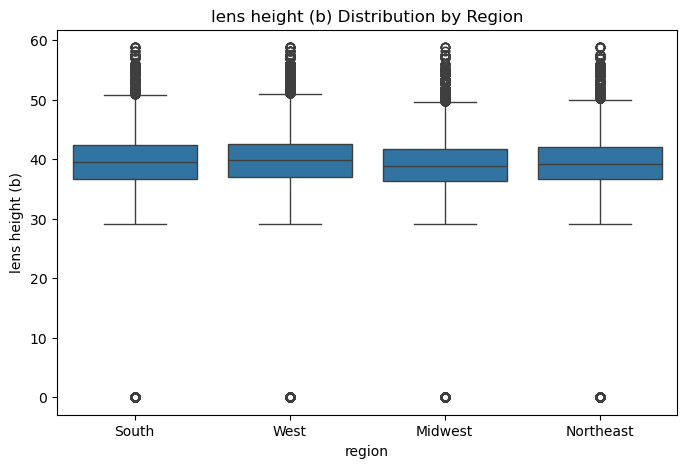

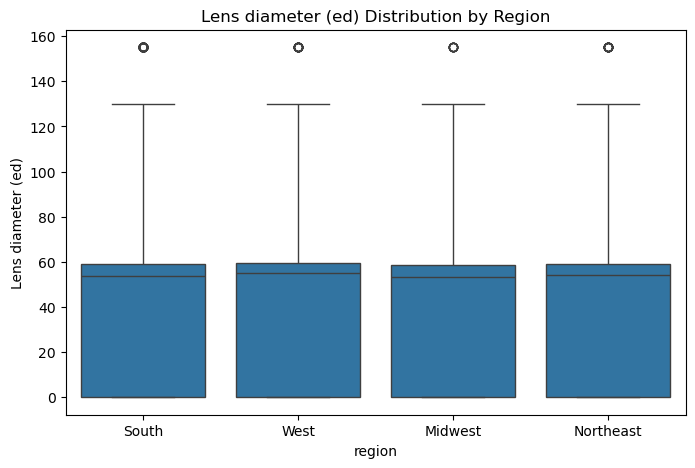

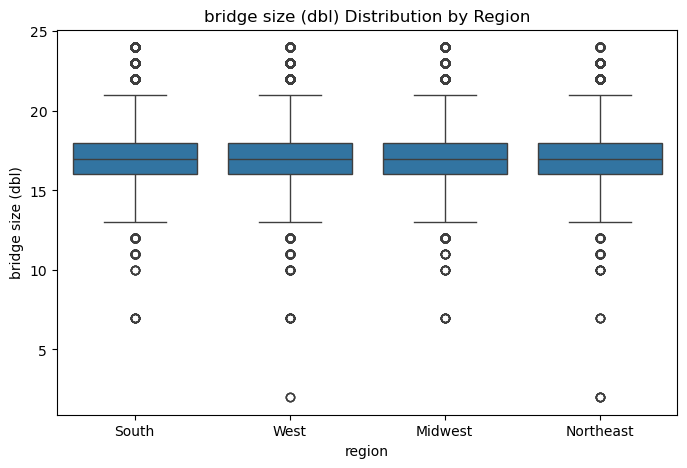

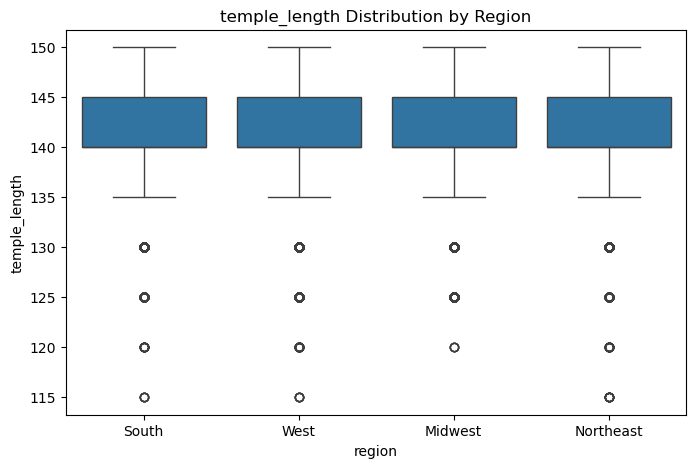

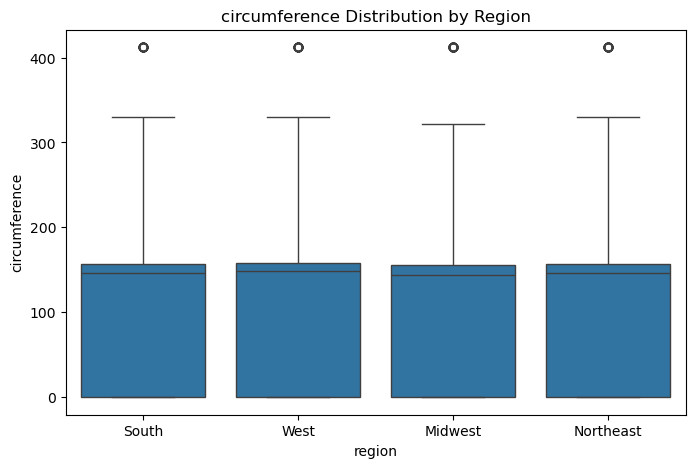

In [95]:
size_features = ['lens height (b)', 'Lens diameter (ed)', 
                 'bridge size (dbl)', 'temple_length', 
                 'circumference']

# Average sizes per region
region_size_summary = (
    df.groupby('region')[size_features]
      .mean()
      .reset_index()
)


print(region_size_summary.head())


for feat in size_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='region', y=feat, data=df)
    plt.title(f"{feat} Distribution by Region")
    plt.show()

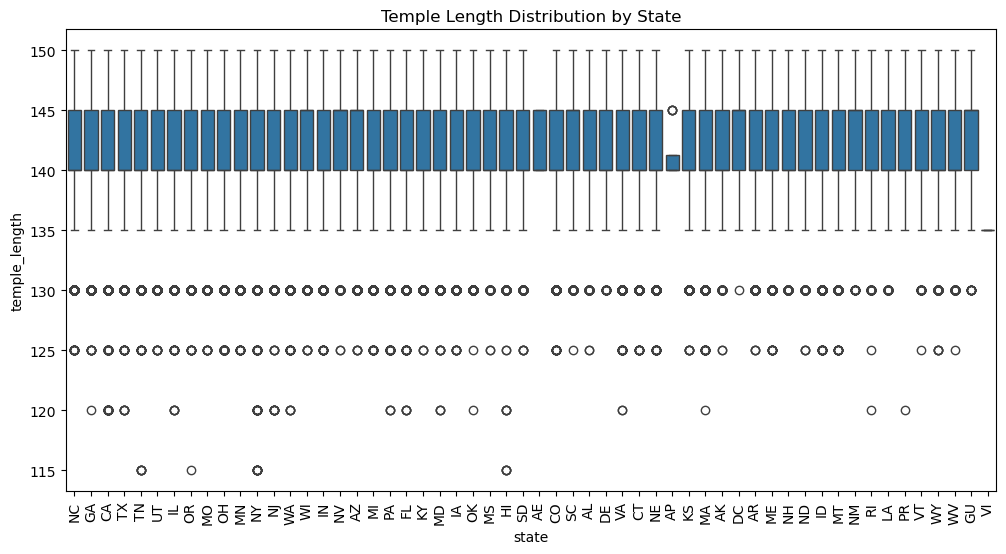

In [96]:
# Compare by state
plt.figure(figsize=(12,6))
sns.boxplot(x='state', y='temple_length', data=df)
plt.xticks(rotation=90)
plt.title("Temple Length Distribution by State")
plt.show()

### Conclusion from region vs size analysis

At both region and state levels, size norms are consistent. That means patients in different parts of the US generally buy the same size ranges.

### Answers to questions

1.a

    From our cluster + brand analysis, the top-selling frames are in Cluster 0 (large premium designer frames, esp. Brand15 & Brand2).
    From feature importance, frame shapes like Rectangle and Square appear frequently as important.

    Therefore, we conclude that Rectangle and Square styles dominate overall sales, especially in large designer frames (Cluster 0).

1.b
    
    price is not in the dataset. But clusters act as a proxy for price.
  
    The data shows demand across both premium and affordable ranges, suggesting a dual-price strategy is optimal (high-margin designer frames + volume-driven affordable frames).

1.c
    
    From Random Forest + PCA loadings, top drivers are Lens height (b), bridge size, lens diameter, size, gross weight, circumference.

    Brand and material matter, but less than fit/dimensions.

    Threfore, we conclude that size/fit attributes are the strongest predictors of sales, followed by brand and frame material.

2.a. 
    
    The most popular frame materials are Titanium and Acetate. Random Forest feature importance shows both as key predictors of sales

2.b.

	National consistency: Sizes are highly consistent across all regions (South, West, Midwest, Northeast). Distributions overlap almost perfectly, with temple length centered around 140–145mm and lens sizes clustering in standard ranges (50–55mm).

	State-level detail: When broken down by state, the same pattern holds. While there are some outliers (e.g., smaller temple lengths around 115–125mm), these appear across multiple states, not concentrated in one.

	Implication: This means size norms are largely universal across the U.S., and there is no strong evidence that specific states or regions require a different sizing strategy.


2.c
